In [1]:
import pickle
import pandas as pd
import tmap as tm
import seaborn as sns

In [2]:
df_original = pickle.load(open("rxn-original.pkl", "rb"))
df_retrained = pickle.load(open("rxn-retrained.pkl", "rb"))

In [9]:
te_original = tm.embed(
    df_original.fps.to_numpy(),
    layout_generator=tm.layout_generators.AnnoyLayoutGenerator(node_size=1/150, k=50, kc=50, keep_knn=True)
)

/home/daenu/miniconda3/envs/bcm-retrain/lib/python3.9/site-packages/scipy/spatial/distance.py:630: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [ ]:
te_retrained = tm.embed(
    df_retrained.fps.to_numpy(),
    layout_generator=tm.layout_generators.AnnoyLayoutGenerator(node_size=1/120, k=50, kc=50, keep_knn=True)
)

In [7]:
sns.set(rc={"figure.figsize":(20, 20)})
sns.scatterplot(
    x=te_retrained.x, 
    y=te_retrained.y, 
    hue=df_retrained.ec1, 
    palette="tab10",
)

NameError: name 'te_retrained' is not defined

<AxesSubplot:>

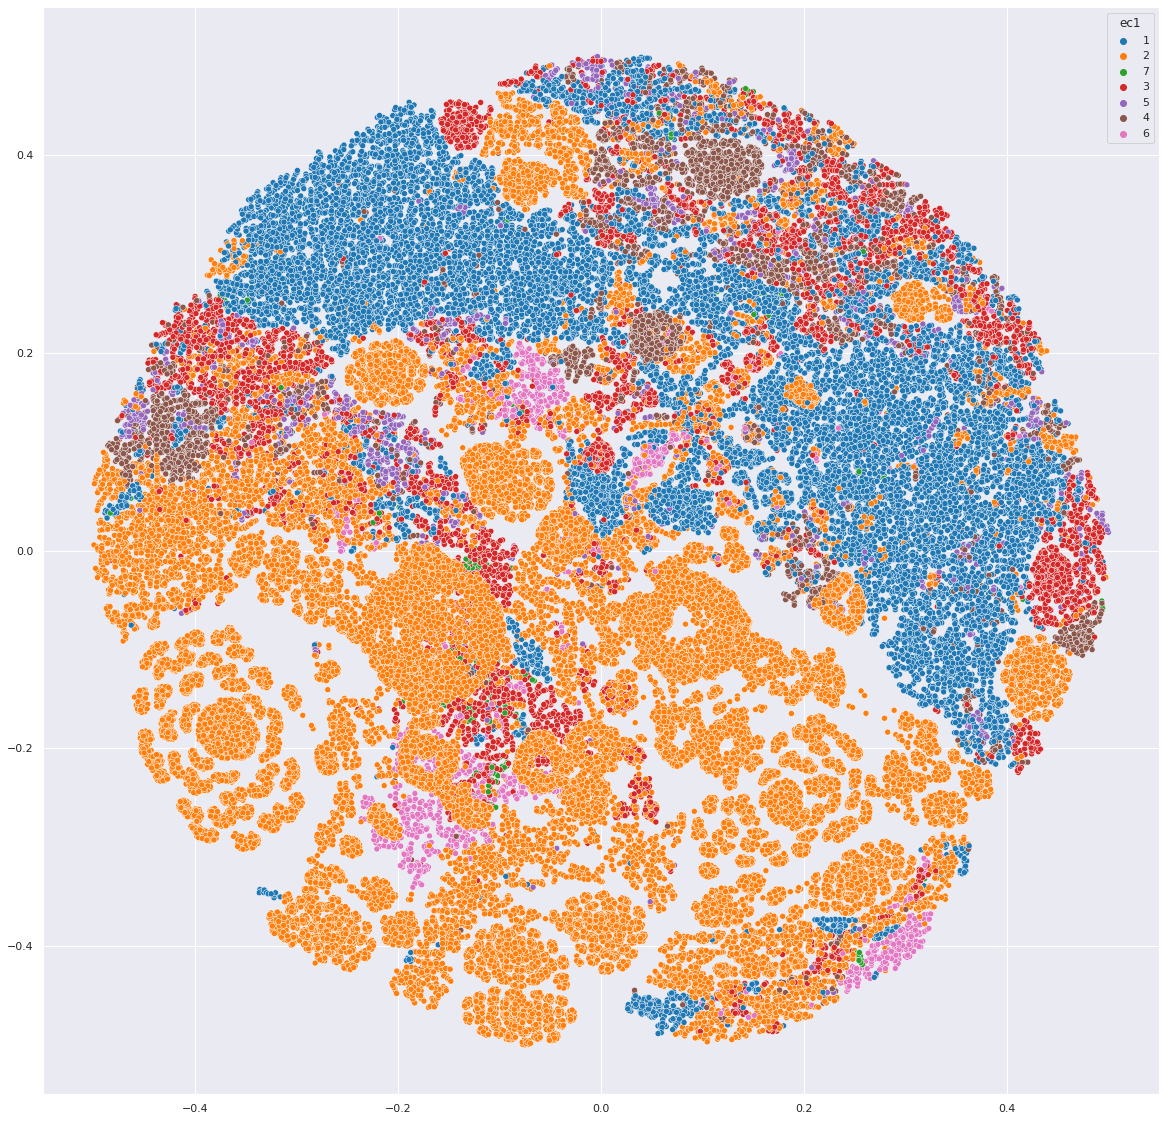

In [8]:
sns.set(rc={"figure.figsize":(20, 20)})
sns.scatterplot(
    x=te_original.x, 
    y=te_original.y, 
    hue=df_original.ec1, 
    palette="tab10",
)

In [45]:
print(len(te_original.graph_properties.adjacency_list))
print(len(te_retrained.graph_properties.adjacency_list))

56579
95842


<AxesSubplot:xlabel='DISTANCE', ylabel='Proportion'>

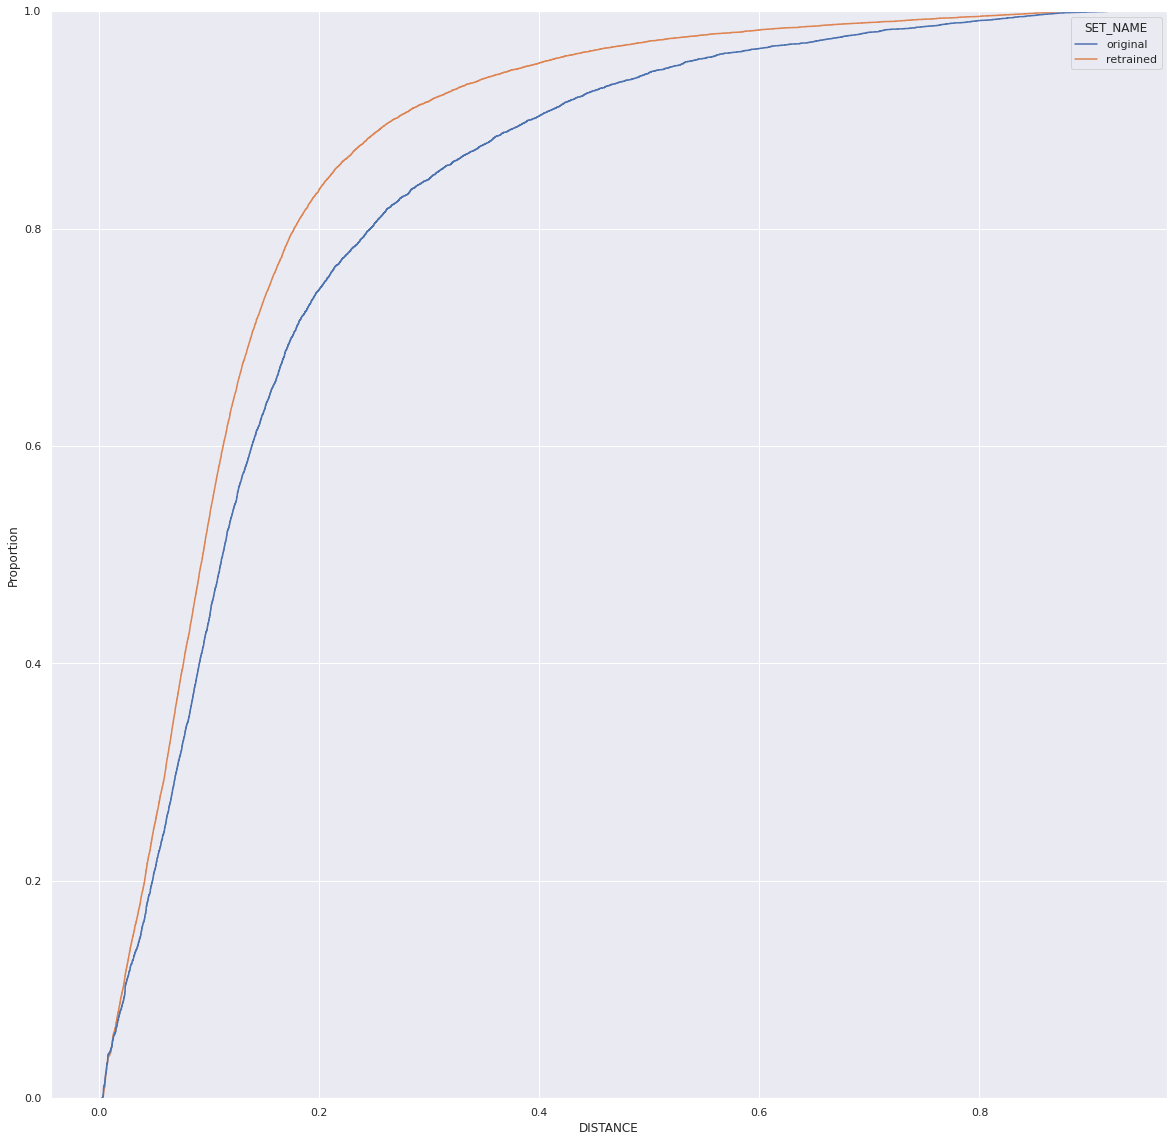

In [118]:
def get_distances(adj_list, classes):
    data = { "DISTANCE": [], "FROM": [], "TO": [], "FROM_CLASS": [], "TO_CLASS": [] }
    for i, neighbours in enumerate(adj_list):
        for j, dist in neighbours:
            data["FROM"].append(i)
            data["TO"].append(j)
            data["DISTANCE"].append(dist)
            data["FROM_CLASS"].append(classes[i])
            data["TO_CLASS"].append(classes[j])

    return pd.DataFrame(data)




df_knn_distances_retrained = get_distances(te_retrained.graph_properties.adjacency_list, df_retrained.ec1.to_list())
df_knn_distances_original = get_distances(te_original.graph_properties.adjacency_list, df_original.ec1.to_list())

df_knn_distances_original["SET_NAME"] = "original"
df_knn_distances_retrained["SET_NAME"] = "retrained"

df = pd.concat([df_knn_distances_original, df_knn_distances_retrained]).reset_index()
sns.ecdfplot(data=df[(df.FROM_CLASS == "2") & (df.DISTANCE > 0)], x="DISTANCE", hue="SET_NAME")